In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import json
from math import sqrt
%matplotlib notebook

In [2]:
prefix = "/home/lit079/Documents/SLAM-project/range-only/build/"
# prefix = "./timeSqExp/testNaive/"

df = pd.read_csv(prefix+"data.csv")
df.columns = ['x', 'y', 'z', 'x_std', 'y_std', 'z_std','time']
df["x+"] = df["x"] + df["x_std"]
df["y+"] = df["y"] + df["y_std"]
df["z+"] = df["z"] + df["z_std"]
df["x-"] = df["x"] - df["x_std"]
df["y-"] = df["y"] - df["y_std"]
df["z-"] = df["z"] - df["z_std"]

print(df)

           x         y         z     x_std     y_std     z_std   time  \
0  -0.270432 -0.943853 -1.084120  0.013153  0.007839  0.013970  12370   
1  -0.223424 -0.979243 -1.002620  0.012949  0.007881  0.012993   5869   
2  -0.154419 -1.041380 -0.961857  0.012755  0.007673  0.012483   5205   
3  -0.086607 -1.103340 -0.957618  0.013150  0.007881  0.013092   5326   
4  -0.038362 -1.159210 -0.986796  0.013666  0.007959  0.014072   6576   
..       ...       ...       ...       ...       ...       ...    ...   
95 -1.434890 -1.537790  0.180636  0.024704  0.007580  0.029120   5568   
96 -1.374540 -1.477760  0.256411  0.024388  0.008051  0.028862   5697   
97 -1.285850 -1.500980  0.337105  0.025615  0.008866  0.030307   5323   
98 -1.195230 -1.354100  0.287173  0.023272  0.008973  0.026901   5541   
99 -1.241590 -0.411517 -0.175092  0.013019  0.007062  0.011576  32138   

          x+        y+        z+        x-        y-        z-  
0  -0.257279 -0.936014 -1.070150 -0.283585 -0.951692 -1.09

In [3]:
path = pd.read_csv("path.csv")

print(path.tail())

df['gnd_x'] = path["x"] 
df['gnd_y'] = path["y"]
df['gnd_z'] = path["z"]

df.iloc[10]

      index         x         y         z
996     996 -0.263446 -0.067733  2.088647
997     997 -0.364201 -0.028504  2.140708
998     998 -0.454753  0.004004  2.182574
999     999 -0.537369  0.025985  2.214841
1000   1000 -0.615967  0.034738  2.237601


x           -0.453938
y           -1.833050
z           -1.574190
x_std        0.020247
y_std        0.007702
z_std        0.025295
time     27077.000000
x+          -0.433691
y+          -1.825348
z+          -1.548895
x-          -0.474185
y-          -1.840752
z-          -1.599485
gnd_x        0.076027
gnd_y       -0.658572
gnd_z       -1.079498
Name: 10, dtype: float64

<IPython.core.display.Javascript object>


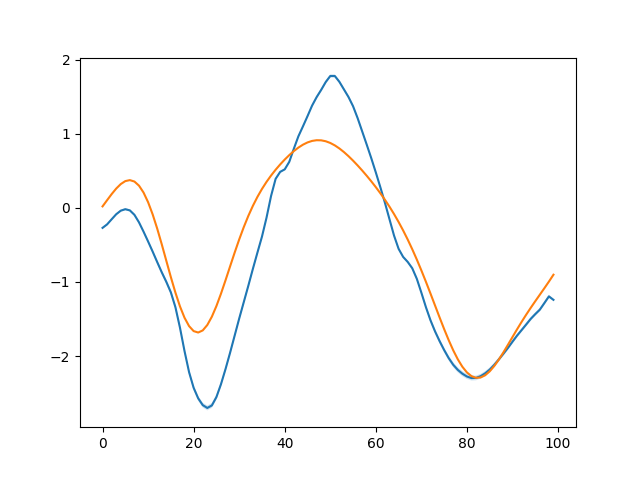

<IPython.core.display.Javascript object>


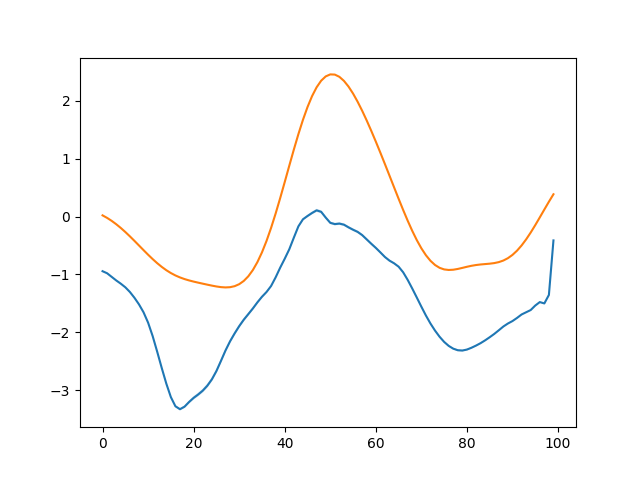

<IPython.core.display.Javascript object>


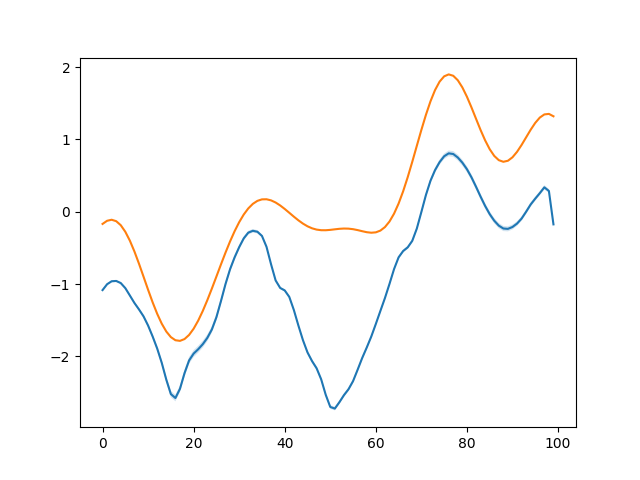

In [4]:
plt.plot(df.index, df['x'])
plt.fill_between(df.index, df['x+'], df['x-'], alpha=0.2)
plt.plot(df.index, df['gnd_x'])

plt.figure()

plt.plot(df.index, df['y'])
plt.fill_between(df.index, df['y+'], df['y-'], alpha=0.2)
plt.plot(df.index, df['gnd_y'])


plt.figure()
plt.plot(df.index, df['z'])
plt.fill_between(df.index, df['z+'], df['z-'], alpha=0.2)
plt.plot(df.index, df['gnd_z'])

plt.show()


3.949931620761797


<IPython.core.display.Javascript object>


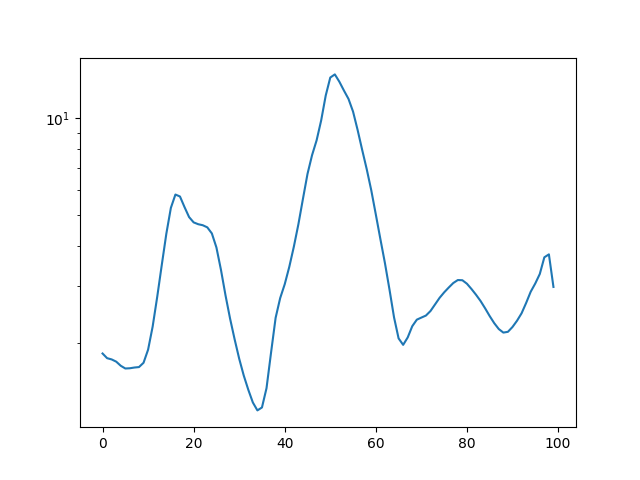

In [5]:
se = (df["x"]-df["gnd_x"])**2 + (df["y"]-df["gnd_y"])**2 + (df["z"]-df["gnd_z"])**2
mse = sum(se)/len(df['x'])
print(mse)
plt.figure()
plt.yscale("log")
plt.plot(df.index, se)
plt.show()

<IPython.core.display.Javascript object>


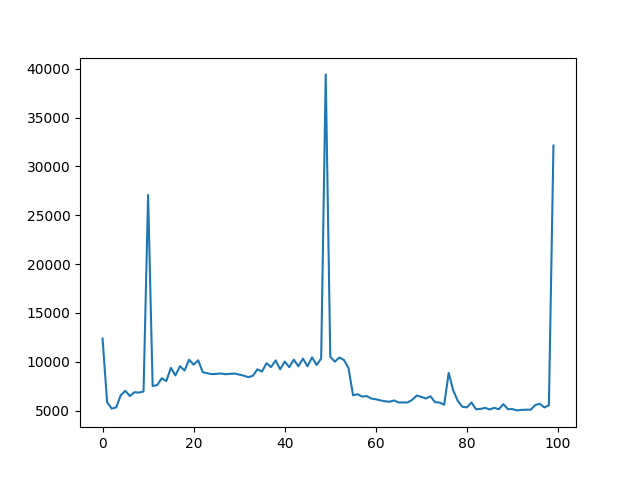

0.824798 s


In [6]:
plt.figure()
plt.plot(df.index, df['time'])
print(sum(df['time'])/10**6, "s")
plt.show()

In [7]:
# anchors = pd.read_csv(prefix+"anchors.csv")

with open(prefix+"../anchors.json") as f:
    anchors = json.load(f)
    
x = [anchor["x"] for anchor in anchors]
y = [anchor["y"] for anchor in anchors]
z = [anchor["z"] for anchor in anchors]

anchors = list(zip(x,y,z))

a=11
path__ = (df["gnd_x"][a],df["gnd_y"][a],df["gnd_z"][a])
print(np.linalg.norm(np.array(anchors[3])-np.array(path__)))


1.312607675283484


<IPython.core.display.Javascript object>


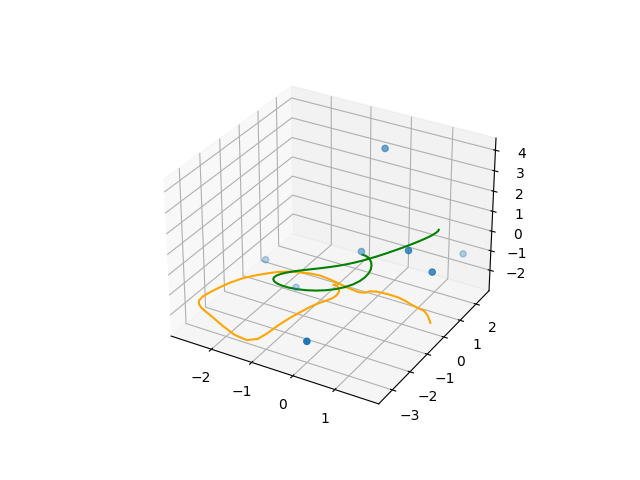

In [8]:
df_50 = df[:50]

ax = plt.figure().add_subplot(projection='3d')
ax.scatter(x,y,z)
ax.plot(df_50['x'],df_50['y'],df_50['z'], c="orange")
ax.plot(df_50['gnd_x'],df_50['gnd_y'],df_50['gnd_z'], c="green")



In [9]:
print(sum(df['time'])/10**6, "s")
print(se[len(se)-1])

0.824798 s
2.986516102543962


In [10]:


dx = [sqrt((anchors[0][0] - df["gnd_x"][i])**2+(anchors[0][1] - df["gnd_y"][i])**2+(anchors[0][2] - df["gnd_z"][i])**2) for i in range (30)]
print(dx)


[0.1714354487261687, 0.16372741775216035, 0.22804919967272527, 0.31924559178272566, 0.4194844679646386, 0.527171379350849, 0.6452596241341714, 0.7771594124195671, 0.9249700949923536, 1.0888129334246974, 1.266812566448075, 1.455359249604551, 1.6494138401659537, 1.8427868328167558, 2.0284138510349, 2.1986938178580875, 2.345923980374254, 2.46283739702123, 2.543205730629195, 2.5824460289720004, 2.5781591855327153, 2.5305291409560633, 2.4425219051263936, 2.319840827088129, 2.1706043145583016, 2.0047216400522143, 1.8329397114510741, 1.665540470863411, 1.5107421956442773, 1.373072573818587]


200 step fully connected
8953 ms
0.018081515014227126

200 step fully connected
21 ms
0.018128581248011585
